In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from nn_analysis import metrics as me
from nn_analysis import utils
from nn_analysis import plot as pt

In [5]:
def load_data(metric, model_name, epoch, layer):
    layer_name = utils.get_layer_name(model_name, layer)
    return me.utils.load_data(model_name, epoch, layer_name, metric[0], metric[1])

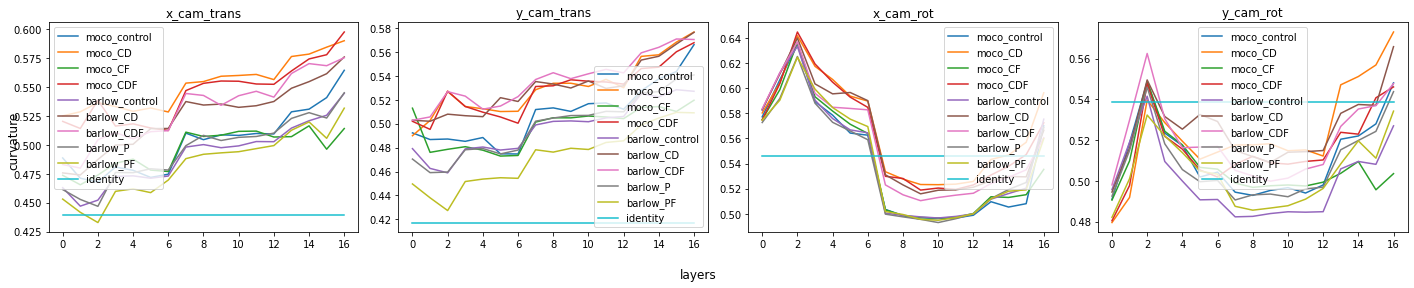

In [36]:
epoch = 49
layers = np.arange(17)
metric = ["curve", 0]
metric_types = ["x_cam_trans", "y_cam_trans", "x_cam_rot", "y_cam_rot"]
# metric_types = ["x_focus_pan", "x_cam_pan"]
model_names = [
    "moco_control",
    "moco_CD",
    "moco_CF",
    "moco_CDF",
    "barlow_control",
    "barlow_CD",
    # "barlow_CF",
    "barlow_CDF",
    "barlow_P",
    "barlow_PF",
]

fig, axes = pt.core.subplots(1, len(metric_types), size=(5,4), sharex=True)
for i, metric_type in enumerate(metric_types):
    for model_name in model_names:
        scores = [load_data(metric, model_name, epoch, layer)[metric_type] for layer in layers]
        axes[0,i].plot(layers, scores, label=model_name)
    scores = [load_data(metric, 'identity', None, 0)[metric_type] for layer in layers]
    axes[0,i].plot(layers, scores, label='identity')
    axes[0,i].set_title(metric_type)
    axes[0,i].legend()
fig.supxlabel('layers')
fig.supylabel('curvature')
fig.tight_layout()
plt.show()

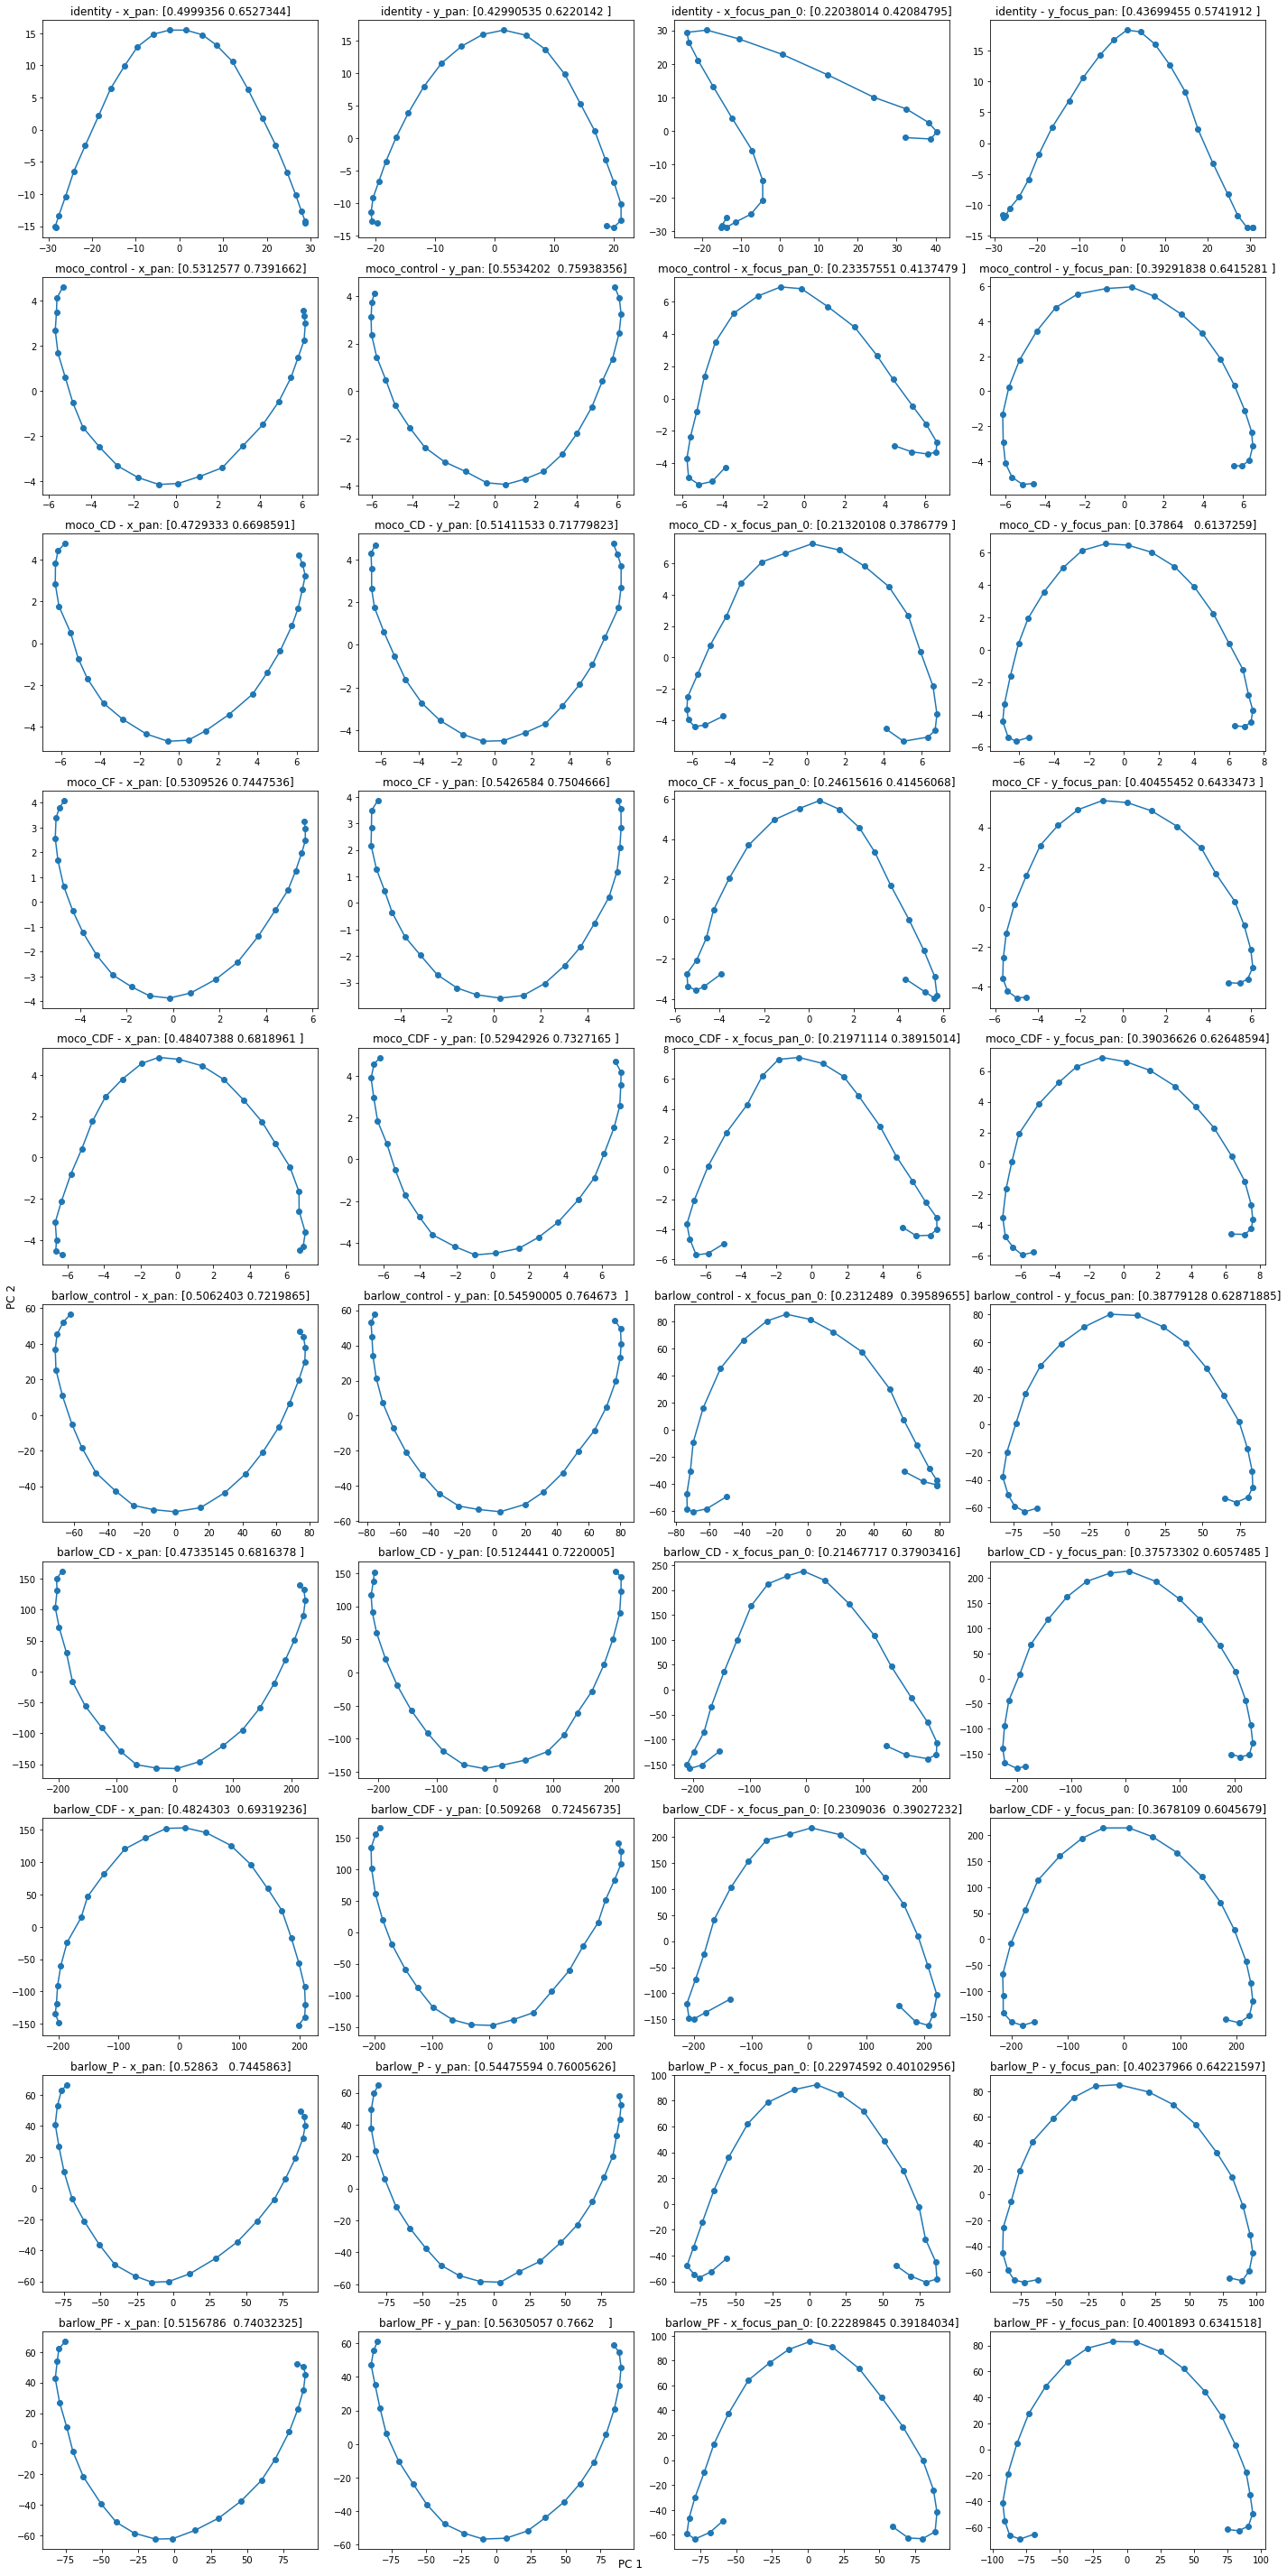

In [39]:
epoch = 49
layer = 10
metric = ["trajectory", 0]
metric_types = ["x_pan", "y_pan", "x_focus_pan_0", "y_focus_pan"]
model_names = [
    "identity",
    "moco_control",
    "moco_CD",
    "moco_CF",
    "moco_CDF",
    "barlow_control",
    "barlow_CD",
    "barlow_CDF",
    "barlow_P",
    "barlow_PF",
]

fig, axes = pt.core.subplots(len(model_names), len(metric_types), size=(5,4))
for i, model_name in enumerate(model_names):
    for j, metric_type in enumerate(metric_types):
        if model_name == 'identity':
            scores = load_data(metric, model_name, None, 0)[metric_type]
            evr = load_data(metric, model_name, None, 0)[f'{metric_type}-evr']
        else:
            scores = load_data(metric, model_name, epoch, layer)[metric_type]
            evr = load_data(metric, model_name, epoch, layer)[f'{metric_type}-evr']
        axes[i,j].plot(scores[:,0], scores[:,1])
        axes[i,j].scatter(scores[:,0], scores[:,1])
        axes[i,j].set_title(f'{model_name} - {metric_type}: {evr[:2]}')
fig.supxlabel('PC 1')
fig.supylabel('PC 2')
fig.tight_layout()
plt.show()